<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/%C4%B0%C5%9Feal%C4%B1mdauygunadaytahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Rastgelelik için seed belirleme
np.random.seed(42)

# Örnek veri boyutu
n = 1000

# Sentetik veri oluşturma
data = {
    # Demografik Bilgiler
    "Yaş": np.random.randint(22, 50, n),
    "Cinsiyet": np.random.choice(["Erkek", "Kadın"], n),
    "Eğitim Seviyesi": np.random.choice(["Lisans", "Yüksek Lisans", "Doktora"], n, p=[0.6, 0.3, 0.1]),
    "Üniversite Türü": np.random.choice(["Devlet", "Vakıf", "Yurtdışı"], n, p=[0.7, 0.2, 0.1]),

    # Deneyim
    "İş Deneyimi (Yıl)": np.random.randint(1, 20, n),
    "Önceki Şirket Sayısı": np.random.randint(1, 5, n),
    "Son Pozisyon": np.random.choice(["Stajyer", "Mühendis", "Takım Lideri", "Yönetici"], n),

    # Teknik Beceriler
    "Python": np.random.choice([0, 1], n, p=[0.3, 0.7]),
    "Java": np.random.choice([0, 1], n, p=[0.6, 0.4]),
    "SQL": np.random.choice([0, 1], n, p=[0.4, 0.6]),
    "Yapay Zeka Bilgisi": np.random.choice([0, 1], n, p=[0.5, 0.5]),

    # Soft Skills
    "Takım Çalışması": np.random.randint(5, 10, n),
    "İletişim Becerileri": np.random.randint(4, 10, n),

    # Değerlendirme Metrikleri
    "Mülakat Puanı": np.random.normal(70, 15, n).round(0).clip(0, 100),
    "Teknik Test Puanı": np.random.normal(65, 20, n).round(0).clip(0, 100),
}

df = pd.DataFrame(data)

# Hedef Değişken (Uygunluk) Oluşturma
# Mantıksal kurallar ekleyerek gerçekçi bir hedef oluşturun:
df["Uygunluk"] = (
    (df["Mülakat Puanı"] > 75) &
    (df["Teknik Test Puanı"] > 60) &
    (df["İş Deneyimi (Yıl)"] > 3) &
    (df["Python"] == 1) &
    (df["Takım Çalışması"] > 7)
).astype(int)

# Gürültü ekleyerek gerçekçilik sağlama (10% rastgele hata)
noise = np.random.choice([0, 1], n, p=[0.9, 0.1])
df["Uygunluk"] = df["Uygunluk"] ^ noise  # XOR işlemi ile gürültü

# Veriyi CSV'ye kaydetme
df.to_csv("sentetik_is_alim_verisi.csv", index=False)

4. Model Eğitimi için Kullanım
Oluşturduğunuz veriyle bir sınıflandırma modeli (Random Forest, Logistic Regression) eğitebilirsiniz:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Kategorik değişkenleri dönüştürme (One-Hot Encoding)
df = pd.get_dummies(df, columns=["Cinsiyet", "Eğitim Seviyesi", "Üniversite Türü", "Son Pozisyon"])

# Özellikler ve hedef
X = df.drop("Uygunluk", axis=1)
y = df["Uygunluk"]

# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model eğitimi
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test doğruluğu
print("Doğruluk:", model.score(X_test, y_test))

Doğruluk: 0.885


In [3]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       172
           1       1.00      0.18      0.30        28

    accuracy                           0.89       200
   macro avg       0.94      0.59      0.62       200
weighted avg       0.90      0.89      0.85       200

Confusion Matrix:
 [[172   0]
 [ 23   5]]


2. Model Optimizasyonu


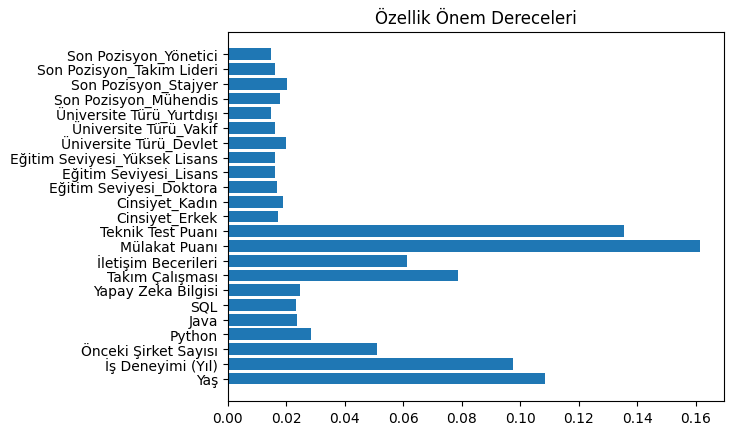

In [4]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.title("Özellik Önem Dereceleri")
plt.show()

1. XGBoost
XGBoost, gradient boosting tabanlı yüksek performanslı bir kütüphanedir. İşe alım verinizdeki karmaşık ilişkileri yakalamak için idealdir.

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Modeli tanımlama
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Eğitim
xgb_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Doğruluk:", accuracy_score(y_test, y_pred_xgb))

XGBoost Doğruluk: 0.88


2. LightGBM
LightGBM, XGBoost'a benzer ancak daha hızlı çalışır ve büyük veri setlerinde daha verimlidir.

In [6]:
from lightgbm import LGBMClassifier

# Modeli tanımlama
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Eğitim
lgbm_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Doğruluk:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 129, number of negative: 671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161250 -> initscore=-1.648957
[LightGBM] [Info] Start training from score -1.648957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

3. Logistic Regression
Basit ve yorumlanabilir bir model. Özelliklerin lineer ilişkilerini yakalamak için kullanılır.

In [7]:
from sklearn.linear_model import LogisticRegression

# Modeli tanımlama
lr_model = LogisticRegression(
    max_iter=1000,  # Yakınsama için yeterli iterasyon
    random_state=42
)

# Eğitim
lr_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Doğruluk:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Doğruluk: 0.865


4. Derin Öğrenme (TensorFlow/Keras)
Basit bir sinir ağı modeli. Sentetik veride aşırı öğrenmeye dikkat

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model mimarisi
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Aşırı öğrenmeyi önlemek için
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modeli derleme
model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Eğitim
history = model_nn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0  # Çıktıyı gizlemek için
)

# Test doğruluğu
loss, accuracy = model_nn.evaluate(X_test, y_test, verbose=0)
print("Sinir Ağı Doğruluk:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sinir Ağı Doğruluk: 0.8600000143051147


5. Tüm Modellerin Karşılaştırılması


In [9]:
models = {
    "Random Forest": model,  # Önceki adımdaki model
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model,
    "Logistic Regression": lr_model,
    "Neural Network": accuracy  # Sinir ağı doğruluğunu elle ekleyin
}

for name, model in models.items():
    if name == "Neural Network":
        print(f"{name}: {model:.3f}")
    else:
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name}: {acc:.3f}")

Random Forest: 0.885
XGBoost: 0.880
LightGBM: 0.880
Logistic Regression: 0.865
Neural Network: 0.860
